# Diamonds Linear Rigression

## 1. Collect, Understand and Prepare Data
In this case, we are using a carefully prepared data from the book `Grokking Artificial Intelligence Algorithms by Rishal Hurbans` and we won't need to cleanse it, tho we need to understand it. The data is a csv data with the columns:
- Carat — The weight of the diamond
- Cut—The quality of the diamond, by increasing quality: fair, good, very good, premium, and ideal.
- Color—The color of the diamond, ranging from D to J, where D is the best color and J is the worst color. D indicates a clear diamond, and J indicates a foggy one.
- Clarity—The imperfections of the diamond, by decreasing quality: FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, and I3. (Don’t worry about understanding these code names; they simply represent different levels of perfection.)
- Depth—The percentage of depth, which is measured from the culet to the table of the diamond. Typically, the table-to-depth ratio is important for the “sparkle” aesthetic of a diamond.
- Table—The percentage of the flat end of the diamond relative to the X dimension.
- Price—The price of the diamond when it was sold.
- X—The x dimension of the diamond, in millimeters.
- Y—The y dimension of the diamond, in millimeters.
- Z—The z dimension of the diamond, in millimeters.

(More information can be found from the bood.)

In [1]:
import csv

with open('diamonds.csv', 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)

## 3. Train a Model

### 3.1. Fiting a Line to the Data
Let's start simple and only use two of our data. Carat and Price.

In [2]:
training_cut_off = 40_000

In [7]:
def fit_line(x, y, training_cut_off):
    x_values = [float(d[x]) * 1000 for d in data[:training_cut_off]]
    y_values = [float(d[y]) for d in data[:training_cut_off]]

    # find the mean of the x_values and y_values
    mean_x = sum(x_values) / len(x_values)
    mean_y = sum(y_values) / len(y_values)

    # calculate the difference between every Carat value and the Carat mean, as well as the difference between every Price value and the Price mean, to find (x_values – mean of x_values) and (y – mean of y)
    x_values = [c - mean_x for c in x_values]
    diff_y_values = [p - mean_y for p in y_values]

    slope = sum([d * p for d, p in zip(x_values, diff_y_values)]) / sum([d ** 2 for d in x_values])

    # calculate the y-intercept of the regression line
    intercept = mean_y - (slope * mean_x)

    return slope, intercept

In [9]:
def predict(x, slope, intercept):
    return (slope * x) + intercept

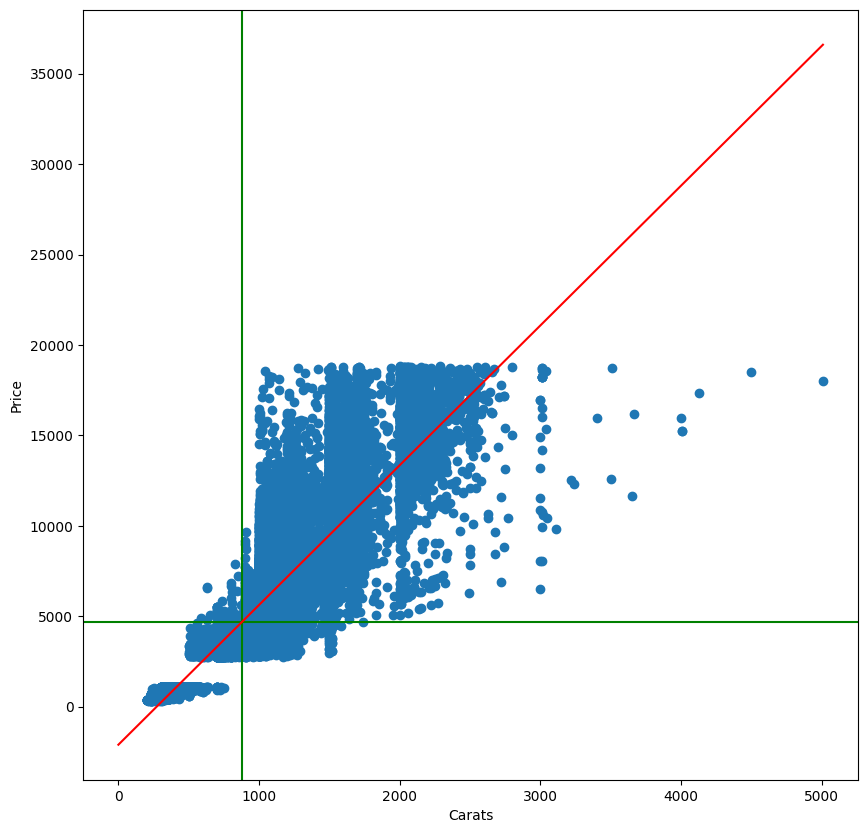

In [10]:
import matplotlib.pyplot as plt

carats = [float(d['carat']) * 1000 for d in data[:training_cut_off]]
prices = [float(d['price']) for d in data[:training_cut_off]]

mean_carats = sum(carats) / len(carats)
mean_prices = sum(prices) / len(prices)

slope, intercept = fit_line('carat', 'price', training_cut_off)
# increase the size of the plot
plt.figure(figsize=(10, 10))
plt.scatter(carats, prices)
# add x and y labels
plt.xlabel('Carats')
plt.ylabel('Price')

# draw a vertical line at the mean of the carats, and a horizontal line at the mean of the prices
plt.axvline(mean_carats, color='g')
plt.axhline(mean_prices, color='g')

# draw the regression line
plt.plot([0, max(carats)], [intercept, slope * max(carats) + intercept], color='r')

## 4. Test the Model

In [6]:
carats = [float(d['carat']) for d in data[training_cut_off:]]
tables = [float(d['table']) for d in data[training_cut_off:]]
prices = [float(d['price']) for d in data[training_cut_off:]]
x_sizes = [float(d['x size']) for d in data[training_cut_off:]]
y_sizes = [float(d['y size']) for d in data[training_cut_off:]]

def fit_plane(x_label, y_label, x_values, y_values, training_cut_off):
    slope, intercept = fit_line(x_label, y_label, training_cut_off)

    correct, incorrect = 0, 0
    for x, y in zip(x_values, y_values):
        predicted = predict(x, slope, intercept)
        if abs(predicted - y) < 1000:
            correct += 1
        else:
            incorrect += 1

    print("Accuracy:", str(round(correct / (correct + incorrect), 5) * 100) + "%")

fit_plane('carat', 'price', carats, prices, training_cut_off)
fit_plane('table', 'price', tables, prices, training_cut_off)
fit_plane('x size', 'price', x_sizes, prices, training_cut_off)
fit_plane('y size', 'price', y_sizes, prices, training_cut_off)

Accuracy: 77.31%
Accuracy: 0.208%
Accuracy: 47.410000000000004%
Accuracy: 44.95%


## 5. Improve Accuracy